In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
#ICPSR
#National Health and Nutrition
#Examination Survey (NHANES), 2005-2006 ICPSR 25504
#United States Department of Health and
#Human Services. Centers for Disease Control and Prevention. National Center for Health Statistics
#Examination: Body Measurements

def coerce_df_columns_to_numeric(df, column_list):
    df[column_list] = df[column_list].apply(pd.to_numeric, errors='coerce')
    
gender = {1:'Male', 2:'Female'}    

df = pd.read_table('25504-0013-Data.tsv', delimiter = '\t', usecols = ['BMXWT', 'BMXHT', 'RIAGENDR', 
                                                                       'BMXWAIST','BMXHEAD','RIDAGEYR'])
coerce_df_columns_to_numeric(df, ['BMXWT', 'BMXHT', 'RIAGENDR', 
                               'BMXWAIST','BMXHEAD','RIDAGEYR'])

df2 = df[['BMXHT', 'RIAGENDR', 'RIDAGEYR']].copy()
df2.replace(gender, inplace=True)
coerce_df_columns_to_numeric(df2, ['BMXHT','RIDAGEYR'])


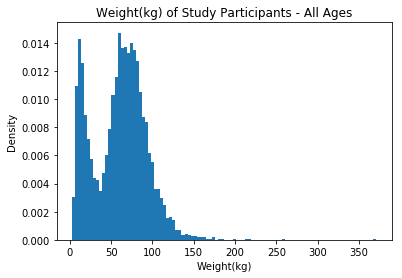

In [3]:
plt.hist(df['BMXWT'].dropna(), density = True, bins = 100)
plt.title('Weight(kg) of Study Participants - All Ages')
plt.xlabel('Weight(kg)')
plt.ylabel('Density')
plt.show()
#Comments:
#A bimodal distribution, perhaps two distinct populations such as children and adults
#The first mode is around 10 to 12 kg; the second mode is around 54 to 56 kg
#The data are skewed right

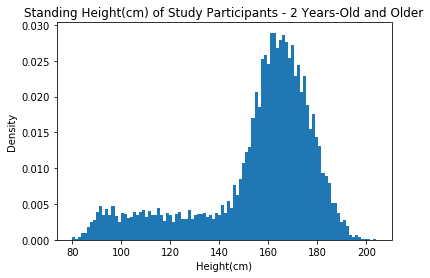

In [4]:
plt.hist(df['BMXHT'].dropna(), density = True, bins = 100)
plt.title('Standing Height(cm) of Study Participants - 2 Years-Old and Older')
plt.xlabel('Height(cm)')
plt.ylabel('Density')
plt.show()
#Notes:
#The distribution is skewed left - possibly due to the growth of children to adult height
#The mode is about 165 cm

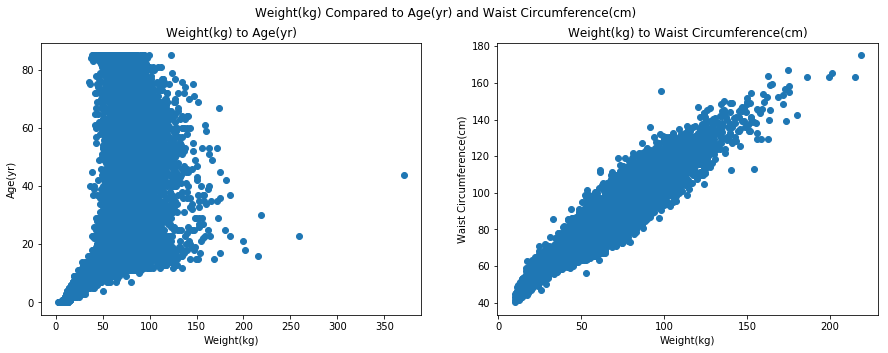

In [5]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(x=df['BMXWT'], y=df['RIDAGEYR'])
plt.title('Weight(kg) to Age(yr)')
plt.xlabel('Weight(kg)')
plt.ylabel('Age(yr)')

plt.subplot(1, 2, 2)
plt.scatter(x=df['BMXWT'], y=df['BMXWAIST'])
plt.title('Weight(kg) to Waist Circumference(cm)')
plt.xlabel('Weight(kg)')
plt.ylabel('Waist Circumference(cm)')

plt.suptitle('Weight(kg) Compared to Age(yr) and Waist Circumference(cm)')
plt.show()
#Notes:
#There is little correlation between weight and age
#Though weight and age may have positive correlation up to 20 years
#There is a positive correlation between weight and waist circumference

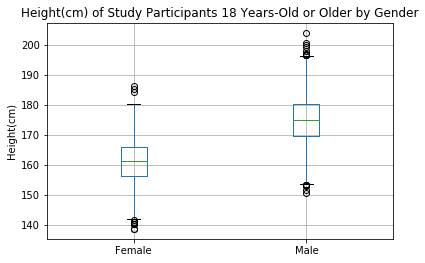

In [6]:
df2[df2['RIDAGEYR']>17.0].boxplot(column = ['BMXHT'], by = 'RIAGENDR')
plt.suptitle('')
plt.title('Height(cm) of Study Participants 18 Years-Old or Older by Gender')
plt.xlabel('')
plt.ylabel('Height(cm)')
plt.show()
#Notes:
#The mean height of males is greater than the mean height of females
#The mean height of females is abount 162 cm 
  #(- 3 standard deviations is about 143 cm and + 3 standard deviations is about 180 cm)
#The mean height of males is abount 175 cm 
  #(- 3 standard deviations is about 154 cm and + 3 standard deviations is about 196 cm)